In [33]:
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv
# will need to run: pip install quandl
import quandl
import plotly.express as px
import plotly.graph_objects as go

In [4]:
#import consumer price data from quandl API. Imports directly as a DataFrame
CPI = quandl.get("RATEINF/CPI_USA")
PPI = quandl.get("FRED/PPIACO")

In [5]:
# Convert CPI/PPI into inflation rate. Calculates the change in CPI/PPI (compared to the same month in the prior year). For example: March 2021 Inflation Rate = (March 2021 CPI - March 2020 CPI)/March 2020 CPI
inflation_rate_cpi = (CPI - CPI.shift(12))/CPI.shift(12)
inflation_rate_ppi = (PPI - PPI.shift(12))/PPI.shift(12)

In [6]:
# Drop Nulls and set column headers
inflation_rate_cpi = inflation_rate_cpi.dropna()
inflation_rate_cpi.columns = ['Inflation Rate CPI']
inflation_rate_ppi = inflation_rate_ppi.dropna()
inflation_rate_ppi.columns = ['Inflation Rate PPI']

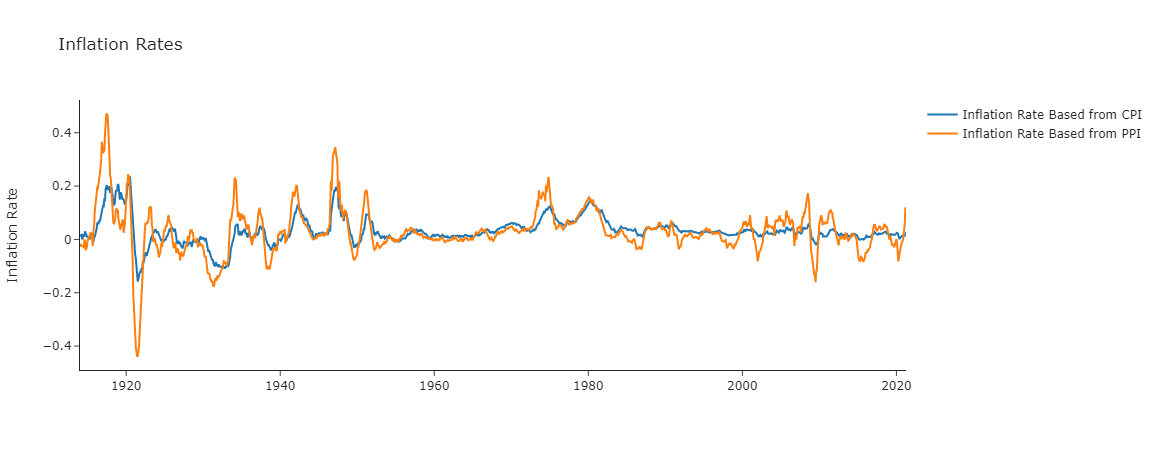

In [55]:
# Make a plotly graph_objects "Figure" and then add the inflation Rate Lines
inflation_rates_chart = go.Figure().update_layout(template="simple_white", yaxis=dict(title="Inflation Rate"), title = "Inflation Rates")
inflation_rates_chart.add_trace(go.Scatter(x= inflation_rate_cpi.index, y=inflation_rate_cpi["Inflation Rate CPI"],mode='lines', name="Inflation Rate Based from CPI"))
inflation_rates_chart.add_trace(go.Scatter(x= inflation_rate_ppi.index, y=inflation_rate_ppi["Inflation Rate PPI"],mode='lines',name="Inflation Rate Based from PPI"))

In [57]:
# Get M1 Money Supply
M_1= quandl.get("FRED/M1SL")
# Get M2 Money Supply
M_2= quandl.get("FRED/M2SL")
# Concat M1 and M2 money supply into one DataFrame
# M1 cash, coins
# M2 = M1 + savings 
M_data = pd.concat([M_1,M_2], axis='columns', join='inner')
M_data.columns=['M1','M2']
M_data.tail()

,M1,M2
Date,,
2020-11-01,17610.0,18960.2
2020-12-01,17829.6,19125.8
2021-01-01,18109.6,19378.7
2021-02-01,18401.0,19650.3
2021-03-01,18682.9,19896.2


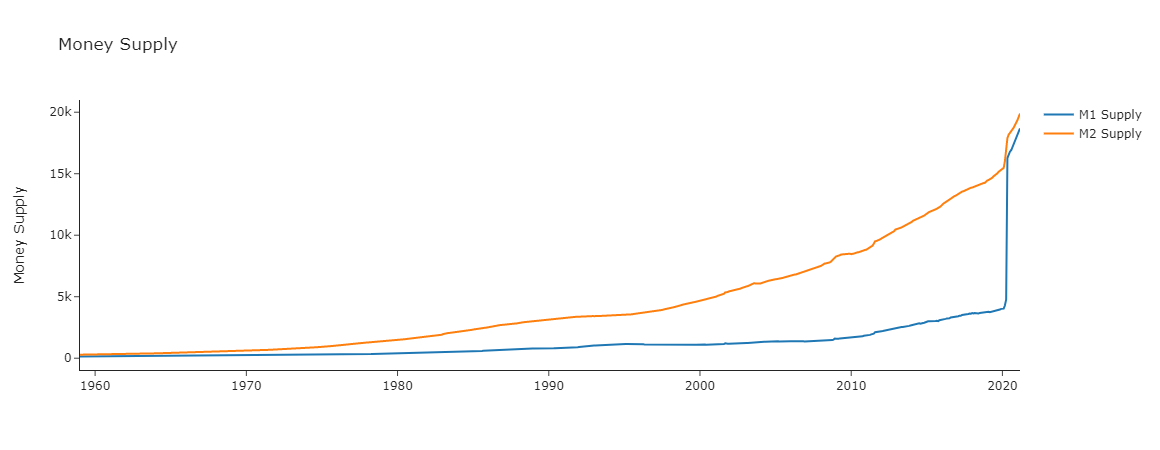

In [58]:
money_supply_chart = go.Figure().update_layout(template="simple_white", yaxis=dict(title="Money Supply"), title = "Money Supply")
money_supply_chart.add_trace(go.Scatter(x= M_data.index, y=M_data["M1"],mode='lines', name="M1 Supply"))
money_supply_chart.add_trace(go.Scatter(x= M_data.index, y=M_data["M2"],mode='lines', name="M2 Supply"))